In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/insurance_Data.csv')
df.shape

(103000, 7)

# **1. EDA**

### **1. Shape of the data**

In [3]:
# Finding the Shape of the Dataset
df.shape

(103000, 7)

In [4]:
# top 5 rows with columns
df.head()

,age,sex,bmi,children,smoker,region,charges
0,20.0,female,26.460966,0.0,yes,southwest,16884.92400
1,20.0,male,32.940494,2.0,no,southeast,1725.55230
2,28.0,male,33.688774,2.0,no,southeast,4449.46200
3,35.0,male,21.575745,1.0,no,NaN,21984.47061
4,34.0,male,27.939742,0.0,no,northwest,3866.85520


In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

### **2. Cleaning Data**

In [6]:
df = df.rename(columns = {'sex':'gender'})

In [7]:
df['age'] = df['age'].replace(0,np.nan)
df['bmi'] = df['bmi'].replace(0,np.nan)
df['charges'] = df['charges'].replace(0,np.nan)

### **3. Filling the missing Values**

In [8]:
df.isnull().sum()

,0
age,5144
gender,5158
bmi,5154
children,5153
smoker,5142
region,5146
charges,0


In [9]:
# Checking the percentage of missing values
df.isnull().sum()/len(df)*100

,0
age,4.994175
gender,5.007767
bmi,5.003883
children,5.002913
smoker,4.992233
region,4.996117
charges,0.000000


In [10]:
# Fillling the missing values by the method fillna()
df['age'] = df['age'].fillna(df['age'].mean())
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])
df['children'] = df['children'].fillna(df['children'].mode()[0])
df['smoker'] = df['smoker'].fillna(df['smoker'].mode()[0])
df['region'] = df['region'].fillna(df['region'].mode()[0])

In [11]:
# Checking After filling missing data
df.isnull().sum()

,0
age,0
gender,0
bmi,0
children,0
smoker,0
region,0
charges,0


### **4. Droping Duplicated Values**

In [12]:
# Checking wheather the dataset is having duplicated values
df.duplicated().sum()

np.int64(3632)

In [13]:
# There are total 3632 duplicated values are present in the data
# So, Droping the duplicated values
df = df.drop_duplicates()

In [14]:
# After removing the duplicates checking the data
df.duplicated().sum()

np.int64(0)

In [15]:
# After removing the missing values and duplicated Values this is the shape of the dataset
# This is the final dataset Shape of the dataset
df.shape

(99368, 7)

### **5. Value_counts and nunique**

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99368 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       99368 non-null  float64
 1   gender    99368 non-null  object 
 2   bmi       99368 non-null  float64
 3   children  99368 non-null  float64
 4   smoker    99368 non-null  object 
 5   region    99368 non-null  object 
 6   charges   99368 non-null  float64
dtypes: float64(4), object(3)
memory usage: 6.1+ MB


In [17]:
num_col = df.select_dtypes(include = ['int64','float64']).columns

In [18]:
for i in num_col:
    print('Value counts:\n', df[i].value_counts())
    print('--------------------------------------------------------------------------')
    print('Unique counts:\n', df[i].unique())
    print('\n')
    #print('nunique',df[i].nunique())

Value counts:
 age
18.000000    5283
39.239076    4988
20.000000    3196
19.000000    2668
21.000000    2531
47.000000    2099
49.000000    2063
51.000000    2060
27.000000    2033
48.000000    2030
46.000000    2003
22.000000    2000
50.000000    1989
44.000000    1989
53.000000    1978
55.000000    1973
52.000000    1972
23.000000    1964
25.000000    1962
28.000000    1958
42.000000    1944
45.000000    1943
26.000000    1941
24.000000    1931
29.000000    1929
43.000000    1920
64.000000    1912
31.000000    1901
41.000000    1890
56.000000    1860
30.000000    1856
54.000000    1853
33.000000    1850
57.000000    1850
34.000000    1842
32.000000    1829
40.000000    1823
37.000000    1798
39.000000    1797
35.000000    1788
38.000000    1771
58.000000    1753
36.000000    1746
59.000000    1726
60.000000    1653
61.000000    1641
62.000000    1603
63.000000    1279
Name: count, dtype: int64
--------------------------------------------------------------------------
Unique counts:
 

In [19]:
df.head()

,age,gender,bmi,children,smoker,region,charges
0,20.0,female,26.460966,0.0,yes,southwest,16884.92400
1,20.0,male,32.940494,2.0,no,southeast,1725.55230
2,28.0,male,33.688774,2.0,no,southeast,4449.46200
3,35.0,male,21.575745,1.0,no,southeast,21984.47061
4,34.0,male,27.939742,0.0,no,northwest,3866.85520


### **6. Outliers in the data**

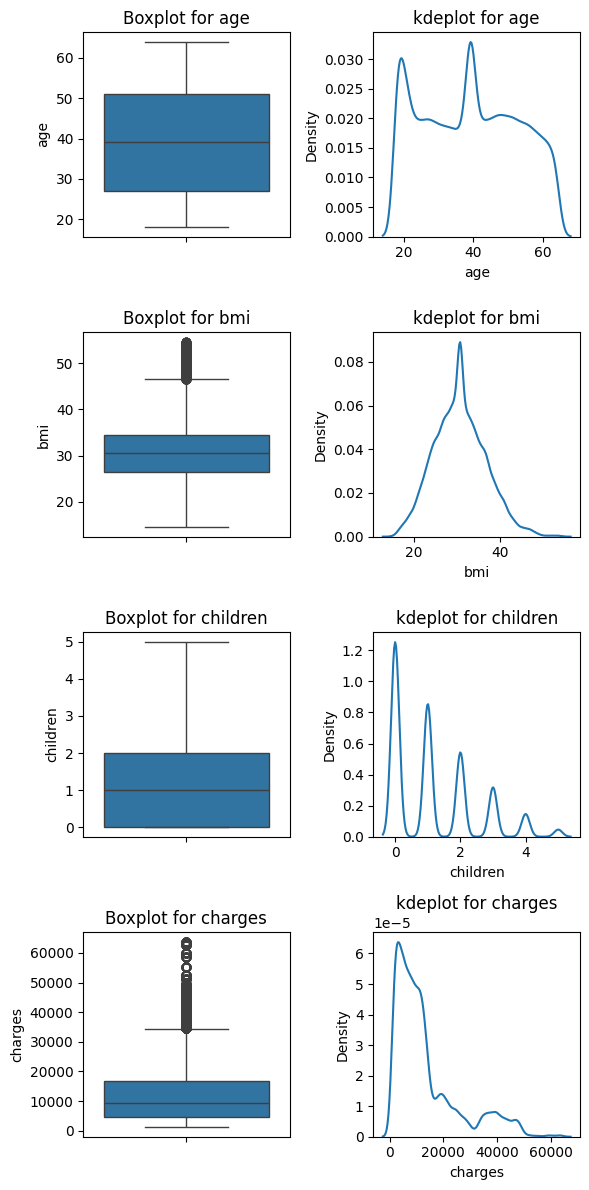

In [20]:
num_col = df.select_dtypes(include = ['int64','float64']).columns
l = len(num_col)
plt.figure(figsize=(6,l*3))
for i ,col in enumerate(num_col,1):
  # Boxplot
  plt.subplot(l,2,2*i-1)
  sns.boxplot(y=df[col])
  plt.title(f'Boxplot for {col}')
  plt.tight_layout()
  # kdeplot
  plt.subplot(l,2,2*i)
  sns.kdeplot(df[col])
  plt.title(f'kdeplot for {col}')
  plt.tight_layout()
plt.show()

In [21]:
# Calculate IQR boundaries
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
df['bmi'] = df['bmi'].clip(upper=upper_limit)

<Axes: ylabel='bmi'>

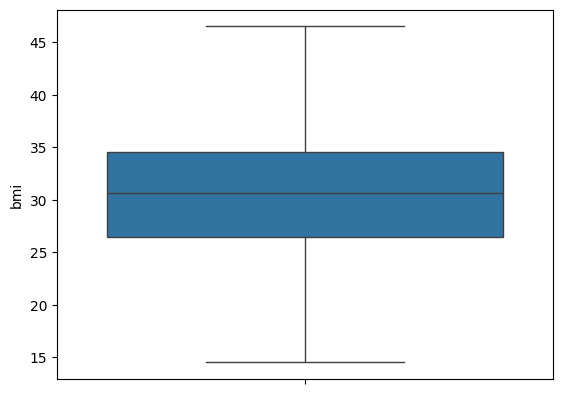

In [22]:
sns.boxplot(df['bmi'])

In [23]:
# Calculate IQR boundaries
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
df['charges'] = df['charges'].clip(upper=upper_limit)

<Axes: ylabel='charges'>

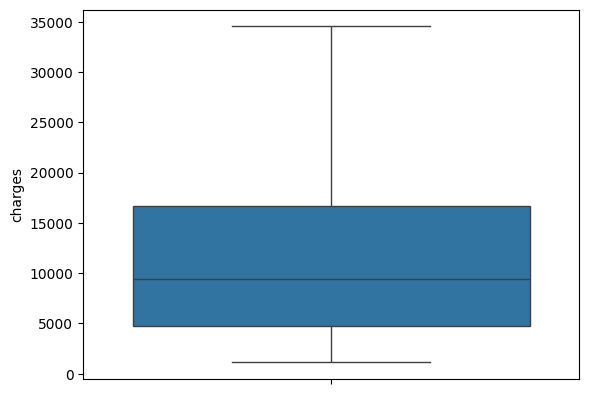

In [24]:
sns.boxplot(df['charges'])

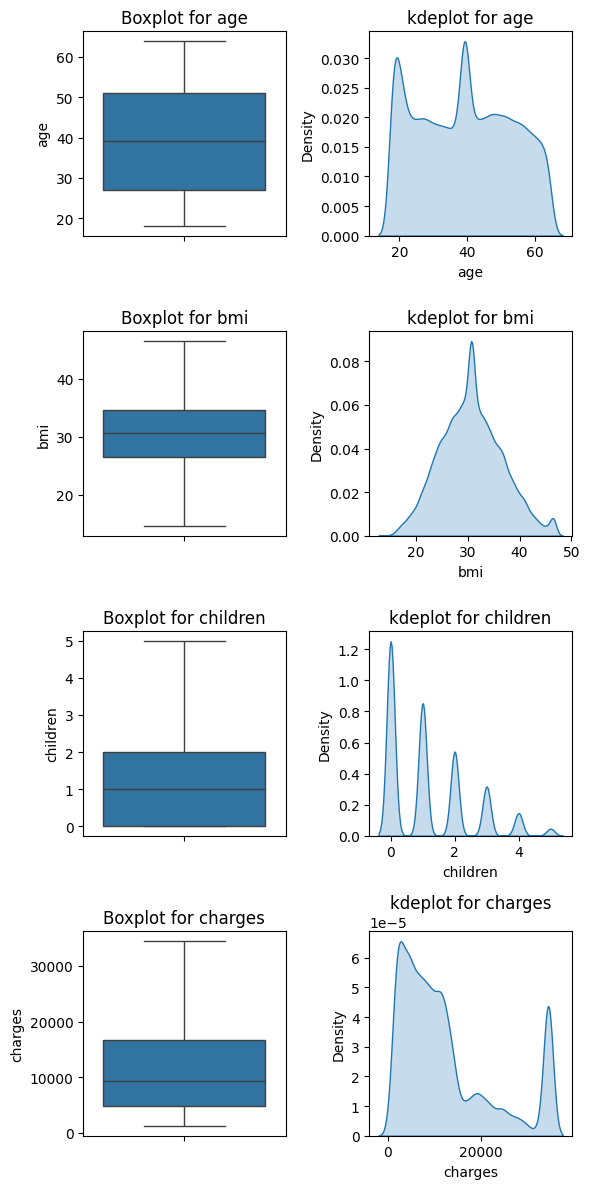

In [25]:
num_col = df.select_dtypes(include = ['int64','float64']).columns
l = len(num_col)
plt.figure(figsize=(6,l*3))
for i ,col in enumerate(num_col,1):
  # Boxplot
  plt.subplot(l,2,2*i-1)
  sns.boxplot(y=df[col])
  plt.title(f'Boxplot for {col}')
  plt.tight_layout()
  # kdeplot
  plt.subplot(l,2,2*i)
  sns.kdeplot(df[col],fill=True)
  plt.title(f'kdeplot for {col}')
  plt.tight_layout()
plt.show()

### **7. Feature selection**

In [26]:
# Select only numeric columns
num_col = df.select_dtypes(include = ['int64','float64'])
num_col.head()

corr_data = num_col.corr()['charges'].sort_values(ascending=False)

print(corr_data)

charges     1.000000
age         0.302881
bmi         0.155708
children    0.058795
Name: charges, dtype: float64


In [27]:
corr_data = pd.DataFrame(corr_data).reset_index()

In [28]:
corr_data

,index,charges
0,charges,1.000000
1,age,0.302881
2,bmi,0.155708
3,children,0.058795


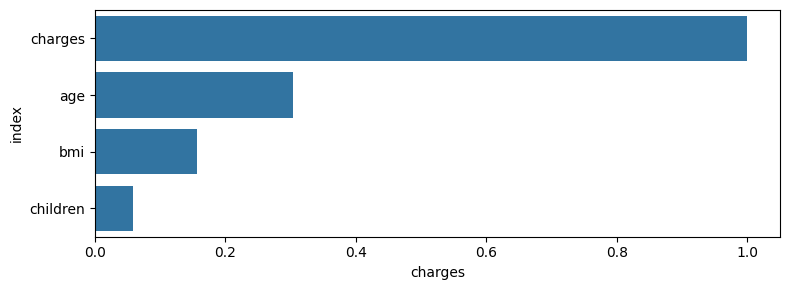

In [29]:
# Advanced feature selection
plt.figure(figsize=(8,3))
sns.barplot(data = corr_data,y='index',x='charges')
plt.tight_layout()
plt.show()

# **2. Model Building**

### **1. Data Transformation**

In [30]:
# Target Variable
X = df.drop(columns=['charges'])
y = df['charges']

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99368 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       99368 non-null  float64
 1   gender    99368 non-null  object 
 2   bmi       99368 non-null  float64
 3   children  99368 non-null  float64
 4   smoker    99368 non-null  object 
 5   region    99368 non-null  object 
 6   charges   99368 non-null  float64
dtypes: float64(4), object(3)
memory usage: 6.1+ MB


In [32]:
# Let us split the data into train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
print('Shape of X_train = ',X_train.shape)
print('Shape of y_train = ',y_train.shape)
print('Shape of X_test = ',X_test.shape)
print('Shape of y_test = ',y_test.shape)

Shape of X_train =  (79494, 6)
Shape of y_train =  (79494,)
Shape of X_test =  (19874, 6)
Shape of y_test =  (19874,)


##### **RandomForest**

In [33]:
# Create pipeline using makepipeline

from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
transformer = ColumnTransformer(transformers = [('t1',StandardScaler(),[0,2,3]),('t2',OrdinalEncoder(),[1,4,5])])
pipe = make_pipeline(transformer,RandomForestRegressor())

In [34]:
# Train the model
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('t1', StandardScaler(),
                                                  [0, 2, 3]),
                                                 ('t2', OrdinalEncoder(),
                                                  [1, 4, 5])])),
                ('randomforestregressor', RandomForestRegressor())])

In [35]:
best_rf = pipe.feature_names_in_
best_rf

array(['age', 'gender', 'bmi', 'children', 'smoker', 'region'],
      dtype=object)

In [36]:
model = pipe.named_steps["randomforestregressor"]
importances = model.feature_importances_
sorted_values = np.sort(importances)

<Axes: ylabel='None'>

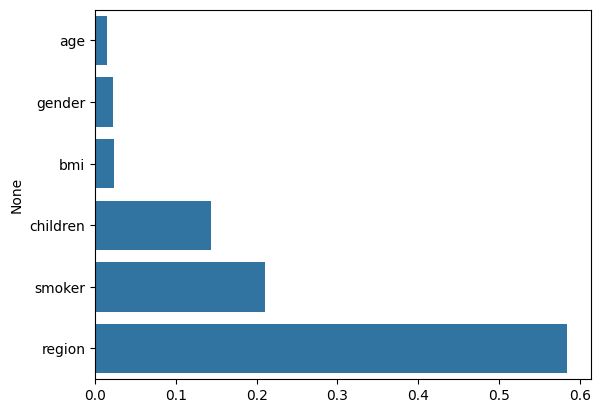

In [37]:
sns.barplot(x = sorted_values,y = X_train.columns)

In [38]:
# Now make prediction
# Predict on test data

y_pred = pipe.predict(X_test)

In [39]:
# Evaluate the model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print('R2 Score', r2_score(y_test, y_pred))
print('Mean Absolute Error', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error', mean_squared_error(y_test, y_pred))

R2 Score 0.8161900969400807
Mean Absolute Error 1991.3949403505792
Mean Squared Error 18853835.734954454


#### **XGboost**

In [40]:
# Create pipeline using makepipeline

from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
transformer = ColumnTransformer(transformers = [('t1',StandardScaler(),[0,2,3]),('t2',OrdinalEncoder(),[1,4,5])])
pipe = make_pipeline(transformer,XGBRegressor())

In [41]:
# Train the model
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('t1', StandardScaler(),
                                                  [0, 2, 3]),
                                                 ('t2', OrdinalEncoder(),
                                                  [1, 4, 5])])),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metri...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [42]:
# Now make prediction
# Predict on test data

y_pred = pipe.predict(X_test)

In [43]:
# Evaluate the model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print('R2 Score', r2_score(y_test, y_pred))
print('Mean Absolute Error', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error', mean_squared_error(y_test, y_pred))

R2 Score 0.8197515632781311
Mean Absolute Error 2411.833982918517
Mean Squared Error 18488527.336465802


In [44]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.2 MB/s eta 0:00:00


In [45]:
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [46]:
# Implementing the pipeline
# Implementing the pipeline
lgbm = make_pipeline(transformer, LGBMRegressor())
rmf  = make_pipeline(transformer, RandomForestRegressor())
dt   = make_pipeline(transformer, DecisionTreeRegressor())
cat  = make_pipeline(transformer, CatBoostRegressor())
knn  = make_pipeline(transformer, KNeighborsRegressor())
xgb  = make_pipeline(transformer, XGBRegressor())

In [47]:
# Fitting lgbm
lgbm.fit(X_train,y_train)

# Fitting random forest
rmf.fit(X_train,y_train)

# # fitting decission ttree
dt.fit(X_train,y_train)

# fitting cataboost
cat.fit(X_train,y_train)

# fitting the k-n-n
knn.fit(X_train,y_train)

# fitting xgbm
xgb.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012590 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 319
[LightGBM] [Info] Number of data points in the train set: 79494, number of used features: 6
[LightGBM] [Info] Start training from score 12493.091088
Learning rate set to 0.08174
0:	learn: 9565.5617788	total: 59.5ms	remaining: 59.5s
1:	learn: 9008.7539572	total: 70.7ms	remaining: 35.3s
2:	learn: 8507.9483845	total: 81.2ms	remaining: 27s
3:	learn: 8062.4714719	total: 91.9ms	remaining: 22.9s
4:	learn: 7662.6507457	total: 102ms	remaining: 20.3s
5:	learn: 7309.9827770	total: 112ms	remaining: 18.6s
6:	learn: 6997.6738077	total: 122ms	remaining: 17.3s
7:	learn: 6721.8723309	total: 132ms	remaining: 16.3s
8:	learn: 6475.5368394	total: 142ms	remaining: 15.6s
9:	learn: 6260.6164477	total: 152ms	remaining: 15s
10:	learn: 6078.6758131	total: 161ms	remaining: 14.5s
11:	learn: 5911.6365963	total: 171ms	remain

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('t1', StandardScaler(),
                                                  [0, 2, 3]),
                                                 ('t2', OrdinalEncoder(),
                                                  [1, 4, 5])])),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metri...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [48]:
# Predict from each model
lgbm_pred = lgbm.predict(X_test)
rmf_pred = rmf.predict(X_test)
dt_pred = dt.predict(X_test)
cat_pred = cat.predict(X_test)
knn_pred = knn.predict(X_test)
xgb_pred = xgb.predict(X_test)

##### **Evaluation Function (COMPLETE VERSION)**

In [49]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

In [50]:
def evaluate(name, y_test, y_pred):
    print(f"\n{name} Results:")
    print("-" * 40)

    # Metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2  = r2_score(y_test, y_pred)

    print(f"MAE  : {mae}")
    print(f"MSE  : {mse}")
    print(f"RMSE : {rmse}")
    print(f"R2   : {r2}")

evaluate("LGBM", y_test, lgbm_pred)
evaluate("RandomForest", y_test, rmf_pred)
evaluate("DecisionTree", y_test, dt_pred)
evaluate("CatBoost", y_test, cat_pred)
evaluate("KNN", y_test, knn_pred)
evaluate("XGBoost", y_test, xgb_pred)


LGBM Results:
----------------------------------------
MAE  : 2424.209496056769
MSE  : 19134410.789890885
RMSE : 4374.289746906449
R2   : 0.8134547133091901

RandomForest Results:
----------------------------------------
MAE  : 1990.421366998469
MSE  : 18898454.20239099
RMSE : 4347.23523660625
R2   : 0.8157551023697723

DecisionTree Results:
----------------------------------------
MAE  : 2050.191312593075
MSE  : 29937453.718674567
RMSE : 5471.512927762719
R2   : 0.7081336369294677

CatBoost Results:
----------------------------------------
MAE  : 2451.6758396593764
MSE  : 18849253.531957787
RMSE : 4341.572702599576
R2   : 0.8162347697748534

KNN Results:
----------------------------------------
MAE  : 1982.237024012076
MSE  : 18617529.516352367
RMSE : 4314.803531605161
R2   : 0.8184938946258311

XGBoost Results:
----------------------------------------
MAE  : 2411.833982918517
MSE  : 18488527.336465802
RMSE : 4299.828756644362
R2   : 0.8197515632781311


## **Pickle file**

In [59]:
import joblib
joblib.dump(pipe, "XG_model.pkl")

['XG_model.pkl']

In [61]:
import joblib # Import joblib for loading
import pandas as pd

# Load and verify
with open("XG_model.pkl", "rb") as f:
    model = joblib.load(f) # Use joblib.load instead of pickle.load

print(type(model))   # should show Pipeline, XGBRegressor, etc.

# run a quick test prediction with the same column order & types
columns = ['age','gender','bmi','children','smoker','region']
sample = pd.DataFrame([[35, "male", 28.5, 2, "no", "southwest"]], columns=columns)

print("Prediction:", model.predict(sample))

<class 'sklearn.pipeline.Pipeline'>
Prediction: [7822.279]


# **Pickle file**

In [51]:
import pickle
with open ('XG_model.pkl','wb') as f:
  pickle.dump(pipe,f)

In [52]:
import pandas as pd
import pickle

# Load your trained model
with open("XG_model.pkl", "rb") as f:
    model = pickle.load(f)

# Columns EXACTLY as used during training
columns = [
    'age', 'gender', 'bmi', 'children',
    'smoker', 'region'
]

# Sample input - match your dataset values
sample_input = pd.DataFrame([[
    35,            # age
    "male",        # gender
    28.5,          # bmi
    2,             # children
    "no",          # smoker (yes/no)
    "southwest"    # region
]], columns=columns)

# Predict
prediction = model.predict(sample_input)

print("Predicted Medical Charges:", prediction[0])

Predicted Medical Charges: 7822.279


In [54]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as st
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

# Redefine the transformer, as it's needed within this cell's context
transformer = ColumnTransformer(transformers = [('t1',StandardScaler(),[0,2,3]),('t2',OrdinalEncoder(),[1,4,5])])

# Create a pipeline with the transformer and XGBRegressor
pipeline = make_pipeline(transformer, XGBRegressor(objective='reg:squarederror'))

param_dist = {
    'xgbregressor__n_estimators': st.randint(100, 2000), # Note the 'xgbregressor__' prefix
    'xgbregressor__max_depth': st.randint(3, 15),
    'xgbregressor__learning_rate': st.uniform(0.01, 0.3),
    'xgbregressor__subsample': st.uniform(0.5, 0.5),
    'xgbregressor__colsample_bytree': st.uniform(0.4, 0.6)
}

random_search = RandomizedSearchCV(
    estimator=pipeline, # Use the pipeline as the estimator
    param_distributions=param_dist,
    n_iter=50,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=2,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Best Params:", random_search.best_params_)
print("Best Score :", random_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Params: {'xgbregressor__colsample_bytree': np.float64(0.6819861763654975), 'xgbregressor__learning_rate': np.float64(0.05092718738604795), 'xgbregressor__max_depth': 9, 'xgbregressor__n_estimators': 756, 'xgbregressor__subsample': np.float64(0.9930619837895618)}
Best Score : -18005919.900257956
